In this file, I would like to study the Linear Regression problem. But I will study it, first without any packages (just numpy and pandas), create a function to compute the Regression and so on. After that, I will discuss how implemented and what are the differences to use Sci-kit learn, Tensorflow or Pytorch.

----
# **Regression**

Let start with the definition of the Regression problem. 

The goal of regression problem is: *determine the relation of an independent variable "x" and dependent variable "y"*. The way in what we will solved this problem, is *find a function*.
However, there are two key ingredients in order to find out the solutions: 

- The space in which we will find the functions.
This space is define by the dimensionality of the (training) data set.

- The criteria of serching these functions
There are some approach (methods or metric) to find the function.

Now, we want to write in formal way. For a (training) set $D$ with $N \in \mathbb{N}$ entries, we define $x_i$ as imput variable and $y_i$ output variable. Such that
$$
\{x_i\}\,, \{y_i\}\,, \quad i \in \{1,2,...,N\}\,.
$$ 
Thus 
$$
D = \{(x_i,y_i)\}_{i=1}^N \subset \mathbb{R}^M \times \mathbb{R}\,,
$$
where $x_i \in \mathbb{R}^M$ (a vector of dimension $M$) and $y_i \in \mathbb{R}$ a scalar (number). So, the function is
\begin{equation}\label{eq.def_regression}
f : \mathbb{R}^M \to \mathbb{R}\,.
\end{equation}
But, we do not know the form of $f$. One way to make a progress is the Linear case or Linear Regression.

---
## I. Linear Regression


The **linear model** define the problem $\eqref{eq.def_regression}$ as
\begin{equation}\label{eq.def_linearRegre}
f: \mathbb{R}^M \to \mathbb{R}\,, \quad x \to y\equiv f(x) = a^t x + b\,, \quad a \in \mathbb{R}^M\,, b\in \mathbb{R} \,.
\end{equation}
but, the form of this function is not linear at all (as linear-transformation's sense); it is **affine** (because the term $b$ break the linearity). 
Now, we have to define some criteria to find the parameters $a,b$. The well known way is define by the **least square**. So, the **cost function** (or cuadratic error) as
\begin{equation}\label{eq.J_cost1}
J(D,f) = \sum_{i=1}^N (y_i -f(x_i))^2\,, 
\end{equation}
This function is quadratic, this means that exist a unique minimum. We can find it out using a derivative (gradient). Therefore

$$
a^*\,, b^* = Min \sum_{i=1}^N (y_i -a^t x_i -b)^2\,, 
$$

where $a^*\,,b^*$ are the mimimum values of $ a,b $ respectively.

Then, we can change of variables in a manner to absorb $b$. Therefore, we define 

\begin{equation}
\tilde{x}_i = \left(\begin{matrix}
x_i\\
1
\end{matrix}\right) \in \mathbb{R}^{M+1}\,, \quad \theta = \left(\begin{matrix}
a\\
b
\end{matrix}\right) \in \mathbb{R}^{M+1}\,.
\end{equation}

Now, $\theta$ contains all the information that we need. If we find $\theta$ we define $f$. Thus, we can rexpress $\eqref{eq.J_cost1}$ as

$$
J(D,f) = \sum_{i=1}^N (y_i -\theta^t \tilde{x}_i)^2\,,
$$
or in matricial representation

\begin{equation} \label{eq.Ext_vecs}
\tilde{X} = \left(\begin{matrix} 
\tilde{x}_1^t\\
\tilde{x}_2^t\\
.\\
.\\
.\\
\tilde{x}_N^t
\end{matrix}\right) \in \mathbb{R}^{N\times (M+1)}\,, \quad Y = \left(\begin{matrix} 
y_1\\
y_2\\
.\\
.\\
.\\
y_N
\end{matrix}\right) \in \mathbb{R}^{N}\,,
\end{equation}

thus

\begin{equation} \label{eq.J_cost2}
J = || Y- \tilde{X}\theta||^2\,.
\end{equation}

So far, we arrange the cost function in order to compute. Now, we will minimize $\eqref{eq.J_cost2}$ with the gradient

\begin{equation} \label{eq.theta}
\nabla_\theta J = 2(Y- \tilde{X}\theta)^t (-\tilde{X})= 0 \quad \to \quad \theta = (\tilde{X}^t \tilde{X})^{-1} \tilde{X}^t Y\,,
\end{equation}

and this is the expression that I would like to implement! Let's get into it!

----
### 1.1 Scratch implementation

Let start the code in order to implement the Linear Regression. First, we load some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

also, we load the dataset. In order to define the dependent value $Y$, we have to load as a array

In [2]:
# Load data 
data_path = 'data/crickets.csv' # data path 
data = np.loadtxt(data_path, delimiter=',') # load data as an array, with delimiter "," (coma)

print(data) #check the data is an array

[[20.         88.59999847]
 [16.         71.59999847]
 [19.79999924 93.30000305]
 [18.39999962 84.30000305]
 [17.10000038 80.59999847]
 [15.5        75.19999695]
 [14.69999981 69.69999695]
 [17.10000038 82.        ]
 [15.39999962 69.40000153]
 [16.20000076 83.30000305]
 [15.         79.59999847]
 [17.20000076 82.59999847]
 [16.         80.59999847]
 [17.         83.5       ]
 [14.39999962 76.30000305]]


in this way, the data is an array. So, we need to pick each column with the next code

In [3]:
X = data[:,0] # All first column of the data set
Y = data[:,1] # All second column of the data set

# Checking the we select correctly
print(X)
print(Y)

[20.         16.         19.79999924 18.39999962 17.10000038 15.5
 14.69999981 17.10000038 15.39999962 16.20000076 15.         17.20000076
 16.         17.         14.39999962]
[88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
 69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
 80.59999847 83.5        76.30000305]


We define the extended vector of the eq. $\eqref{eq.Ext_vecs}$

In [18]:
# "np.ones(len(X))"  Create new array filled with ones with the same dimension of X

X_tilde = np.vstack((X,np.ones(len(X)))).T # Create a array of two rows, the first is the "x" values of the data and the second row are "1". Then we transpose
X_tilde_t = X_tilde.T # The transpose of the above vector

X_tilde, X_tilde_t

(array([[20.        ,  1.        ],
        [16.        ,  1.        ],
        [19.79999924,  1.        ],
        [18.39999962,  1.        ],
        [17.10000038,  1.        ],
        [15.5       ,  1.        ],
        [14.69999981,  1.        ],
        [17.10000038,  1.        ],
        [15.39999962,  1.        ],
        [16.20000076,  1.        ],
        [15.        ,  1.        ],
        [17.20000076,  1.        ],
        [16.        ,  1.        ],
        [17.        ,  1.        ],
        [14.39999962,  1.        ]]),
 array([[20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
         15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
         15.        , 17.20000076, 16.        , 17.        , 14.39999962],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

the inverse of a product

In [20]:
XX_inv = np.linalg.inv(X_tilde_t.dot(X_tilde))
XX_inv

array([[ 0.02465645, -0.41061216],
       [-0.41061216,  6.90472779]])

Then we define the weight value $\theta$ of the eq. $\eqref{eq.theta}$, as

In [27]:
theta = XX_inv.dot(X_tilde_t.dot(Y))
theta

array([ 3.29109457, 25.23230498])

this value of $\theta$ define the valus of $a$ and $b$. Therefore

In [31]:
# Definition of our function y = f(x) = a^t X + b

a = theta[0]
b = theta[1]
Y_reg = a*X + b

Text(0.5, 1.0, 'Linear regression for Cricket dataset')

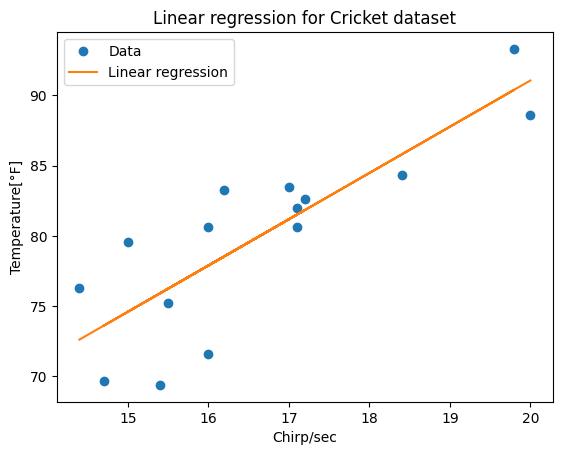

In [38]:
# Plot

plt.plot(X, Y, 'o', label='Data')
plt.plot(X, Y_reg, label='Linear regression')

# Legends and labels
plt.legend()
plt.xlabel('Chirp/sec')
plt.ylabel('Temperature[°F]')
plt.title('Linear regression for Cricket dataset')
